<ipython-input-1-34d4e46b07af>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


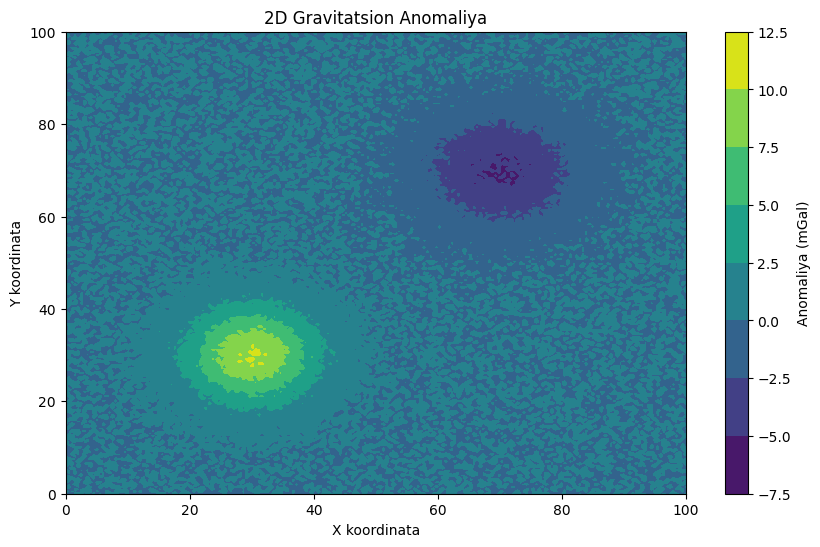

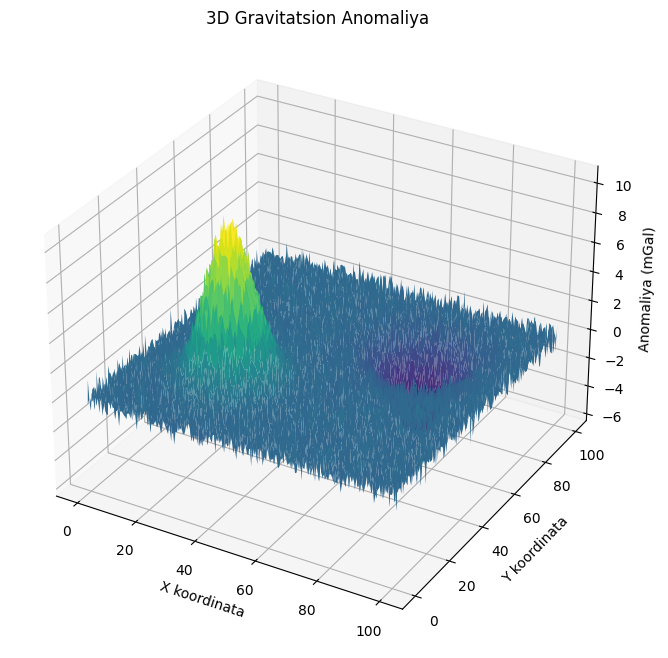

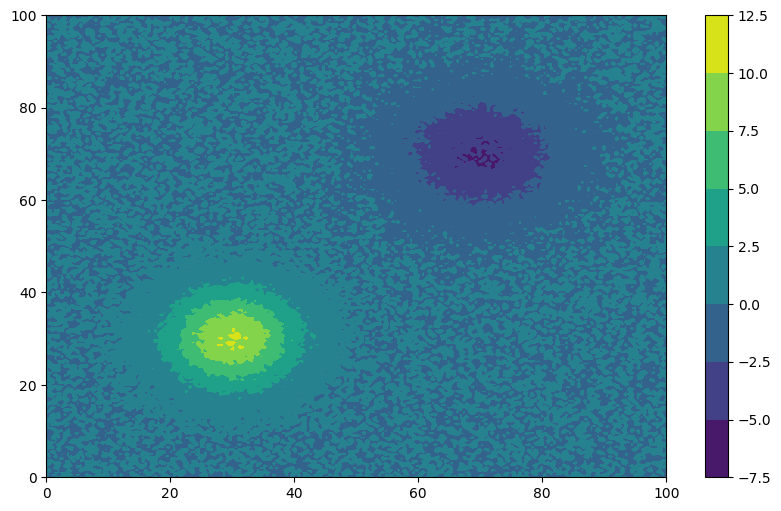

In [1]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# 1. Ma'lumotni tayyorlash
# Sun'iy gravitatsion ma'lumotlarni yaratish
x = np.linspace(0, 100, 200)  # X koordinatalar
y = np.linspace(0, 100, 200)  # Y koordinatalar
X, Y = np.meshgrid(x, y)

# Zamonaviy gravimetrdan olingan ma'lumotlarni taqlid qilish
z1 = 10 * np.exp(-((X - 30)**2 + (Y - 30)**2) / 100)  # 1-qatlam
z2 = -5 * np.exp(-((X - 70)**2 + (Y - 70)**2) / 150)  # 2-qatlam
total_gravity = z1 + z2 + np.random.normal(0, 0.5, X.shape)  # Shovqin qo'shilgan anomaliya

# Ma'lumotlarni CSV formatida saqlash
data = pd.DataFrame({'X': X.ravel(), 'Y': Y.ravel(), 'Gravity': total_gravity.ravel()})
data.to_csv('gravity_data.csv', index=False)

# 2. Gravitatsion anomaliyalarni hisoblash
# O'rtacha qiymatni hisoblab, anomaliyani ajratib olish
average_gravity = np.mean(total_gravity)
gravity_anomaly = total_gravity - average_gravity

# 3. 2D grafik yaratish
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, gravity_anomaly, cmap='viridis')
plt.colorbar(label='Anomaliya (mGal)')
plt.title('2D Gravitatsion Anomaliya')
plt.xlabel('X koordinata')
plt.ylabel('Y koordinata')
plt.show()

# 4. 3D grafik yaratish
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, gravity_anomaly, cmap='viridis')
ax.set_title('3D Gravitatsion Anomaliya')
ax.set_xlabel('X koordinata')
ax.set_ylabel('Y koordinata')
ax.set_zlabel('Anomaliya (mGal)')
plt.show()

# 5. Animatsiya yaratish
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.contourf(X, Y, gravity_anomaly, cmap='viridis')
plt.colorbar(c, ax=ax)

def update(frame):
    updated_anomaly = gravity_anomaly + frame * 0.1 * np.sin(frame / 10)
    for c in ax.collections:
        c.remove()  # Eskirgan qatlamlarni olib tashlash
    new_c = ax.contourf(X, Y, updated_anomaly, cmap='viridis')
    return new_c.collections

ani = animation.FuncAnimation(fig, update, frames=50, interval=100, blit=False)
plt.show()
